# Pobranie danych z bazy

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")


con = sqlite3.connect("game_database.db")
cur = con.cursor()

c:\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [21]:
sql_query = """
SELECT game.*, difficulties.difficulty_level FROM game
JOIN difficulties ON (game.game_id = difficulties.game_id) AND (game.game_id NOT IN (SELECT difficulties.game_id FROM difficulties GROUP BY difficulties.game_id HAVING COUNT(*) > 1))
WHERE player_satisfaction != -1
--   AND playing_time < 120; -- jest 5 gier powyżej 120 sekund
"""

df = pd.read_sql_query(sql_query, con)
print(df.head())
# shape
print(df.shape)

   game_id  score  player_satisfaction  playing_time  difficulty_level
0       59   7501                    4     27.850465                 2
1       60  15788                    5     81.156830                 1
2       61   5890                    5     22.403121                 2
3       62  13440                    5     39.971035                 3
4       64  12741                    2     66.330811                 1
(174, 5)


In [14]:
# Rozgrywki powyżej 120 sekund to 5 gier na poziomie 1 z satysfakcją 5 cztery razy oraz jedną 3 (140 sekund)
df.loc[df['playing_time']>120, :]

,game_id,score,player_satisfaction,playing_time,difficulty_level
48,130,23242,5,120.605560,1
89,203,97491,5,499.357099,1
93,229,28496,3,142.447654,1
149,317,100992,5,522.119535,1
160,329,78447,5,393.112058,1


# Wykresy

## Wszystkie dane

c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


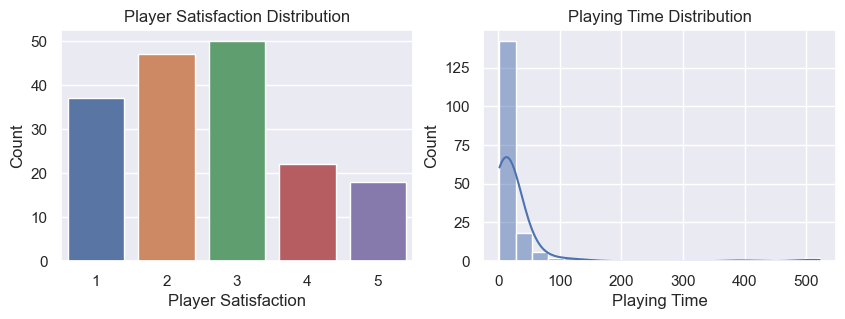

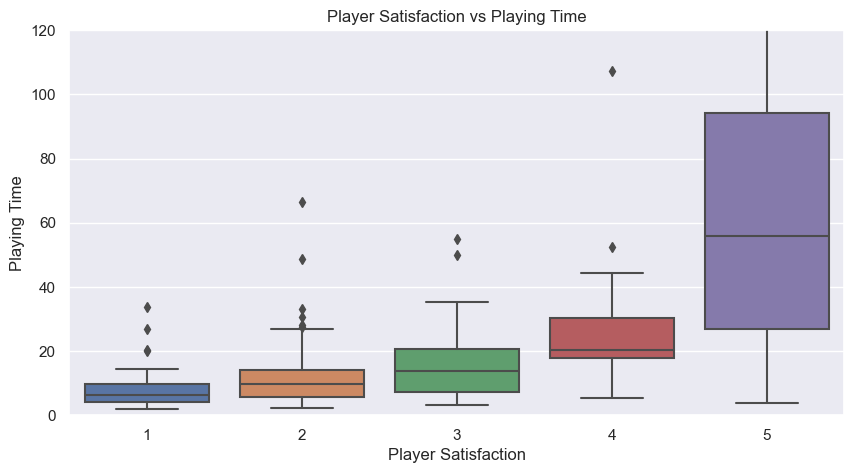

In [22]:
# Plot player satisfaction and playing_time distribution

fig, ax = plt.subplots(1, 2, figsize=(10, 3))

sns.countplot(x='player_satisfaction', data=df, ax=ax[0])
# sns.histplot(df['player_satisfaction'], bins=20, kde=True)
ax[0].set_title('Player Satisfaction Distribution')
ax[0].set_xlabel('Player Satisfaction')
ax[0].set_ylabel('Count')

sns.histplot(df['playing_time'], bins=20, kde=True, ax=ax[1])
ax[1].set_title('Playing Time Distribution')
ax[1].set_xlabel('Playing Time')
ax[1].set_ylabel('Count')

plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='player_satisfaction', y='playing_time', data=df)
plt.title('Player Satisfaction vs Playing Time')
plt.xlabel('Player Satisfaction')
plt.ylabel('Playing Time')
plt.ylim(0, 120)
plt.show()


## Time [10, 120] sec

c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


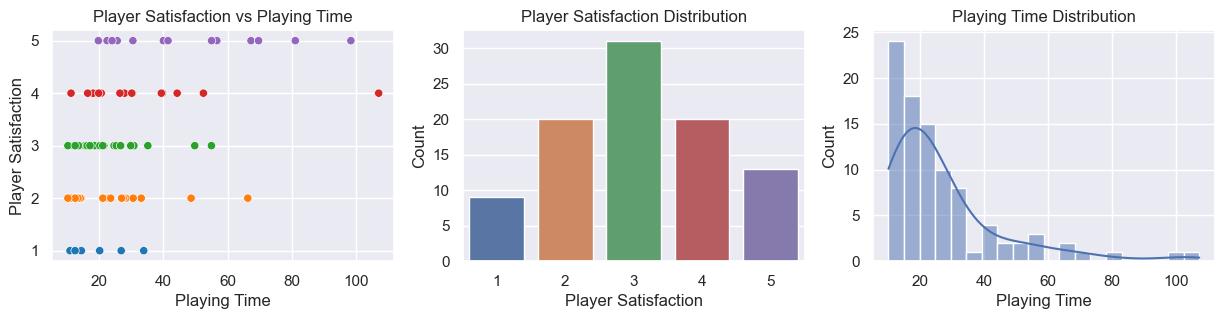

In [27]:
# plot satisfaction for playing time between 10 and 60
df_plot = df[(df['playing_time'] >= 10) & (df['playing_time'] <= 120)]

fig, ax = plt.subplots(1, 3, figsize=(15, 3))
sns.scatterplot(x='playing_time', y='player_satisfaction', data=df_plot, ax=ax[0], hue='player_satisfaction', palette="tab10")
ax[0].set_title('Player Satisfaction vs Playing Time')
ax[0].set_xlabel('Playing Time')
ax[0].set_ylabel('Player Satisfaction')
# remove legend
ax[0].get_legend().remove()

sns.countplot(x='player_satisfaction', data=df_plot, ax=ax[1])
ax[1].set_title('Player Satisfaction Distribution')
ax[1].set_xlabel('Player Satisfaction')
ax[1].set_ylabel('Count')

sns.histplot(df_plot['playing_time'], bins=20, kde=True, ax=ax[2])
ax[2].set_title('Playing Time Distribution')
ax[2].set_xlabel('Playing Time')
ax[2].set_ylabel('Count')
plt.show()

## Time [0,10] sec

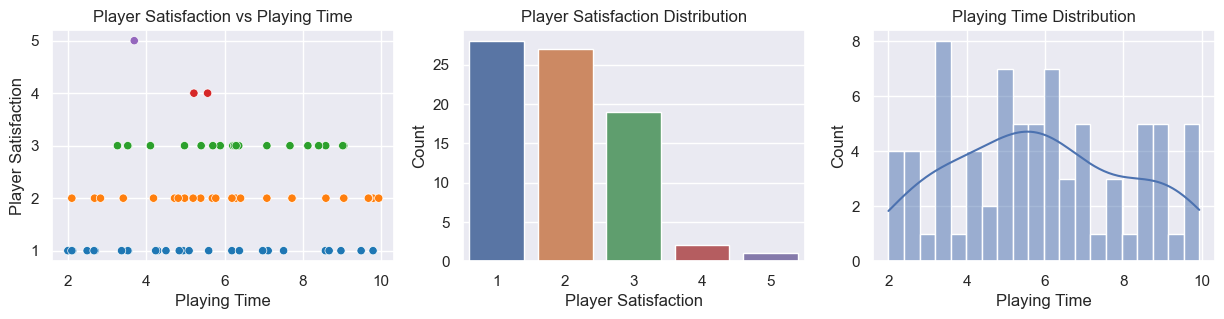

In [50]:
# plot satisfaction for playing time between 0 and 10
df_plot = df[(df['playing_time'] <= 10)]


fig, ax = plt.subplots(1, 3, figsize=(15, 3))
sns.scatterplot(x='playing_time', y='player_satisfaction', data=df_plot, ax=ax[0], hue='player_satisfaction', palette="tab10")
ax[0].set_title('Player Satisfaction vs Playing Time')
ax[0].set_xlabel('Playing Time')
ax[0].set_ylabel('Player Satisfaction')
# remove legend
ax[0].get_legend().remove()

sns.countplot(x='player_satisfaction', data=df_plot, ax=ax[1])
ax[1].set_title('Player Satisfaction Distribution')
ax[1].set_xlabel('Player Satisfaction')
ax[1].set_ylabel('Count')

sns.histplot(df_plot['playing_time'], bins=20, kde=True, ax=ax[2])
ax[2].set_title('Playing Time Distribution')
ax[2].set_xlabel('Playing Time')
ax[2].set_ylabel('Count')
plt.show()

## Satisfaction $\geq$ 4

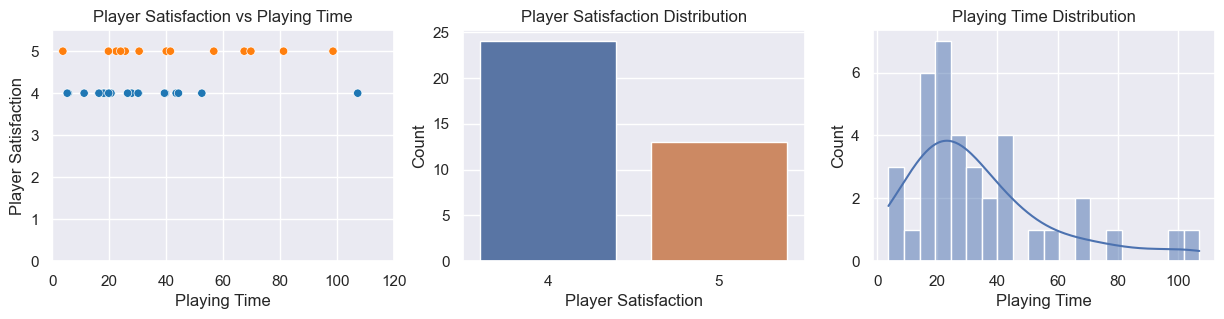

In [52]:
df_plot = df[(df['player_satisfaction'] >= 4)]

fig, ax = plt.subplots(1,3,figsize=(15, 3))
sns.scatterplot(x='playing_time', y='player_satisfaction', data=df_plot, ax=ax[0], hue='player_satisfaction', palette="tab10")
ax[0].set_title('Player Satisfaction vs Playing Time')
ax[0].set_xlabel('Playing Time')
ax[0].set_ylabel('Player Satisfaction')
ax[0].set_xlim(0, 120)
ax[0].set_ylim(0, 5.5)
ax[0].get_legend().remove()

sns.countplot(x='player_satisfaction', data=df_plot, ax=ax[1])
ax[1].set_title('Player Satisfaction Distribution')
ax[1].set_xlabel('Player Satisfaction')
ax[1].set_ylabel('Count')

sns.histplot(df_plot['playing_time'], bins=20, kde=True, ax=ax[2])
ax[2].set_title('Playing Time Distribution')
ax[2].set_xlabel('Playing Time')
ax[2].set_ylabel('Count')
plt.show()

## Difficulty

Average Player Satisfaction for Difficulty Level 1: 2.6
Average Player Satisfaction for Difficulty Level 2: 3.0789473684210527
Average Player Satisfaction for Difficulty Level 3: 3.3513513513513513


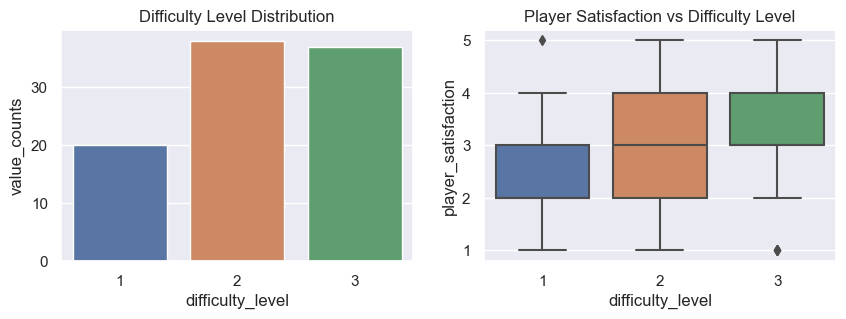

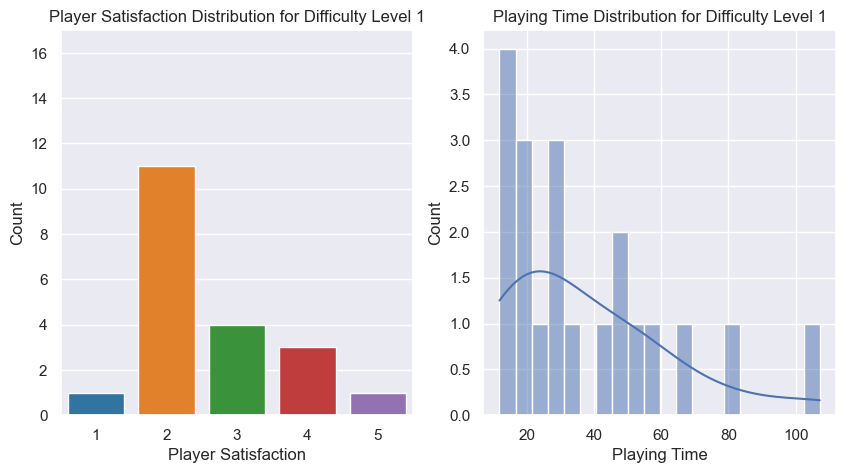

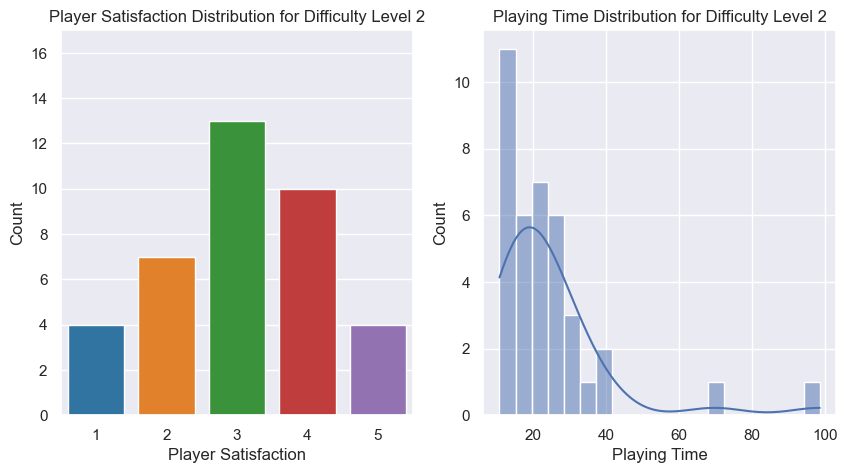

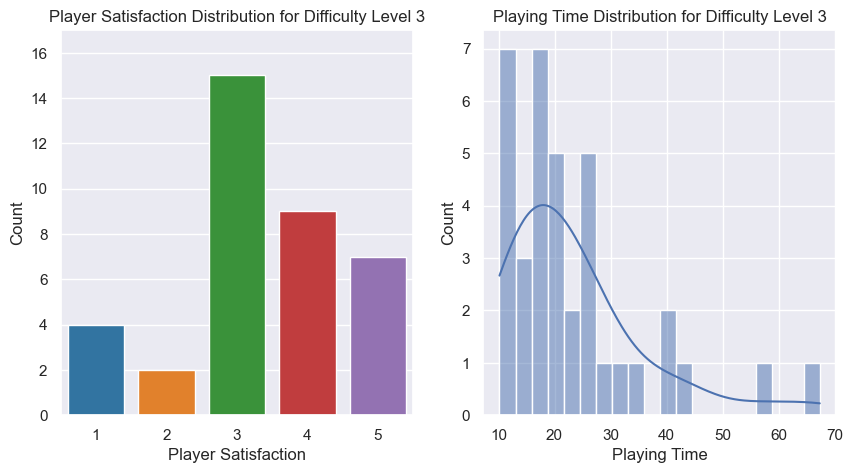

In [66]:
# plot difficulty level distribution and player satisfaction

df = df[df['playing_time'] >= 10]

# count the number of games for each difficulty level
df['value_counts'] = df['difficulty_level'].map(df['difficulty_level'].value_counts())

# create subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.barplot(x='difficulty_level', y='value_counts', data=df, ax=ax[0])
# sns.histplot(df['difficulty_level'], bins=7, ax=ax[0])
ax[0].set_title('Difficulty Level Distribution')

sns.boxplot(x='difficulty_level', y='player_satisfaction', data=df, ax=ax[1])
ax[1].set_title('Player Satisfaction vs Difficulty Level')


# plot player satiscation and playing time distribution for each difficulty level

max_count = df.groupby(['player_satisfaction','difficulty_level']).size().max()

for difficulty_level in df['difficulty_level'].unique():
    df_plot = df[df['difficulty_level'] == difficulty_level]

    # print average player satisfaction
    print(f'Average Player Satisfaction for Difficulty Level {difficulty_level}: {df_plot["player_satisfaction"].mean()}')

    # fig, ax = plt.subplots(1, 2, figsize=(5, 3))
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    sns.countplot(x='player_satisfaction', data=df_plot, ax=ax[0], palette="tab10")
    ax[0].set_title(f'Player Satisfaction Distribution for Difficulty Level {difficulty_level}')
    ax[0].set_xlabel('Player Satisfaction')
    ax[0].set_ylabel('Count')
    ax[0].set_ylim(0, max_count + 2)
    ax[0].yaxis.set_major_locator(plt.MaxNLocator(integer=True))

    sns.histplot(df_plot['playing_time'], bins=20, kde=True, ax=ax[1])
    ax[1].set_title(f'Playing Time Distribution for Difficulty Level {difficulty_level}')
    ax[1].set_xlabel('Playing Time')
    ax[1].set_ylabel('Count')
    

plt.show()

## Maps played

## Keys Pressed

In [26]:
sql_query = """
SELECT *, g.game_id as game_idd FROM game g
LEFT JOIN difficulties d ON (g.game_id = d.game_id) AND (g.game_id NOT IN (SELECT d2.game_id FROM difficulties d2 GROUP BY d2.game_id HAVING COUNT(*) > 1))
JOIN KeysPressed kp ON (g.game_id = kp.game_id)"""

df = pd.read_sql_query(sql_query, con)
df = df.drop(columns=['game_id'])
print(df.head())
print(df.columns)

   score  player_satisfaction  playing_time  difficulty_level key_type  \
0   2699                   -1      9.776133               2.0        d   
1   2699                   -1      9.776133               2.0     d up   
2   2699                   -1      9.776133               2.0        d   
3   2699                   -1      9.776133               2.0     d up   
4   2699                   -1      9.776133               2.0        a   

     player_z  game_idd  
0  348.317902        58  
1  403.434998        58  
2  467.686798        58  
3  499.670715        58  
4  554.596375        58  
Index(['score', 'player_satisfaction', 'playing_time', 'difficulty_level',
       'key_type', 'player_z', 'game_idd'],
      dtype='object')


In [32]:
# Count the number of keys pressed for each game
# df_plot = df.groupby(['game_id','key_type']).size().reset_index(name='count')
df_plot = df.groupby(['game_idd','key_type']).size().reset_index(name='count')

# pivot keys_type to columns
df_plot = df_plot.pivot(index='game_idd', columns='key_type', values='count').fillna(0)
# drop every column with name containing 'up'
df_plot = df_plot.loc[:, ~df_plot.columns.str.contains('up')]
# drop column 'w'
df_plot = df_plot.drop(columns=['w'])

print(df_plot.head())

key_type     a     d    s  space
game_idd                        
58         2.0   3.0  2.0    1.0
59        10.0  11.0  4.0    8.0
60        25.0  28.0  4.0   15.0
61         2.0   3.0  2.0    2.0
62        10.0   9.0  4.0    3.0


c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

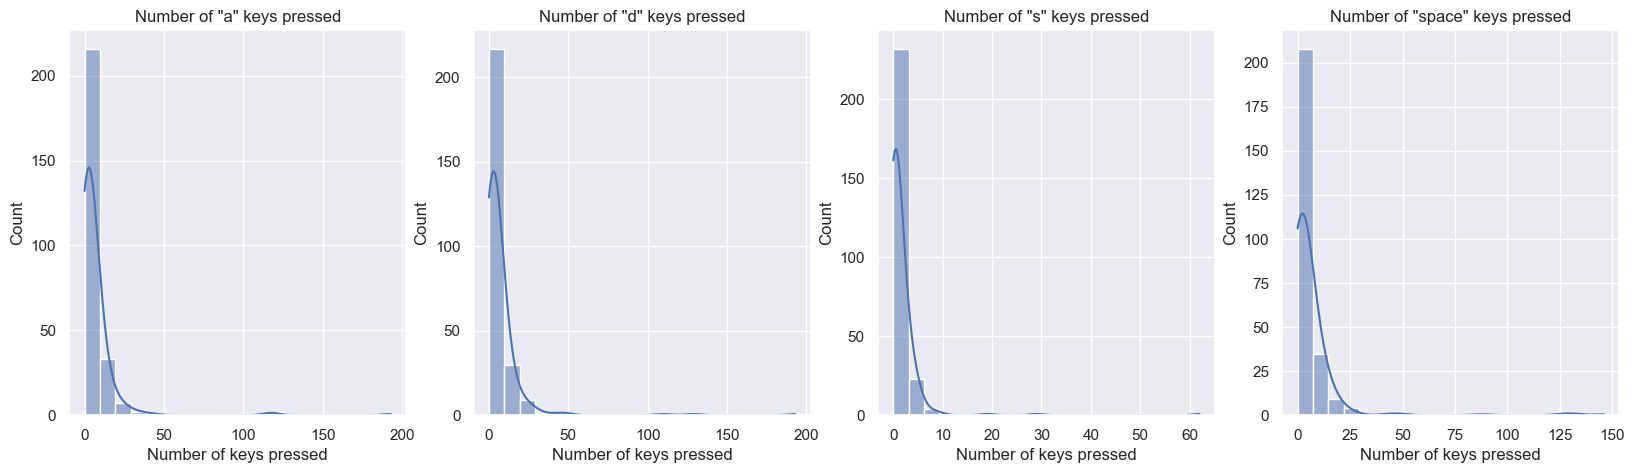

In [34]:
# plot the number of keys pressed for each game
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for i, column in enumerate(df_plot.columns):
    # sns.boxplot(x=column, data=df_plot, ax=ax[i])
    sns.histplot(df_plot[column], bins=20, kde=True, ax=ax[i])
    ax[i].set_title(f'Number of "{column}" keys pressed')
    ax[i].set_xlabel('Number of keys pressed')
    ax[i].set_ylabel('Count')
